# CUSTOMER SEGMENTATION USING MACHINE LEARNING

### Customer segmentation aims to group similar customers together, enabling businesses to tailor their strategies and services more effectively to each segment's needs.

## Name:  APOORVA
## E-Mail:  apoorvay75@gmail.com

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

file_path = r'C:\Users\manoj\OneDrive\Desktop\CODES\Dataset_cus_seg.csv'

df = pd.read_csv(file_path)

In [24]:
df = pd.read_csv(r'C:\Users\manoj\OneDrive\Desktop\CODES\Dataset_cus_seg.csv')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [25]:
df.shape #Rows,Columns

(541909, 8)

In [26]:
df.info() #Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [27]:
df.describe().T  #Transpose

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [28]:
df['Description'] = df['Description'].str.replace('Description', '')

In [29]:
null_counts = df.isnull().sum()
for col, null_count in null_counts.items():
    if null_count > 0:
        print(f'Column {col} contains {null_count} null values.')

Column Description contains 1454 null values.
Column CustomerID contains 135080 null values.


In [30]:
df = df.dropna()
print("Total missing values are:", len(df))

Total missing values are: 406829


In [31]:
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [32]:
date_parts = df["InvoiceDate"].str.split(" ", n=1, expand=True)
date_parts.columns = ["date", "time"]
date_components = date_parts["date"].str.split("-", n=2, expand=True)
df["day"] = date_components[0].astype('int')
df["month"] = date_components[1].astype('int')
df["year"] = date_components[2].astype('int')

In [33]:
columns_to_drop = ['InvoiceNo']
df.drop(columns=columns_to_drop, inplace=True)

In [34]:
floats, objects = [], []
for col in df.columns:
    if df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == float:
        floats.append(col)
 
print(objects)
print(floats)

['StockCode', 'Description', 'InvoiceDate', 'Country']
['UnitPrice', 'CustomerID']


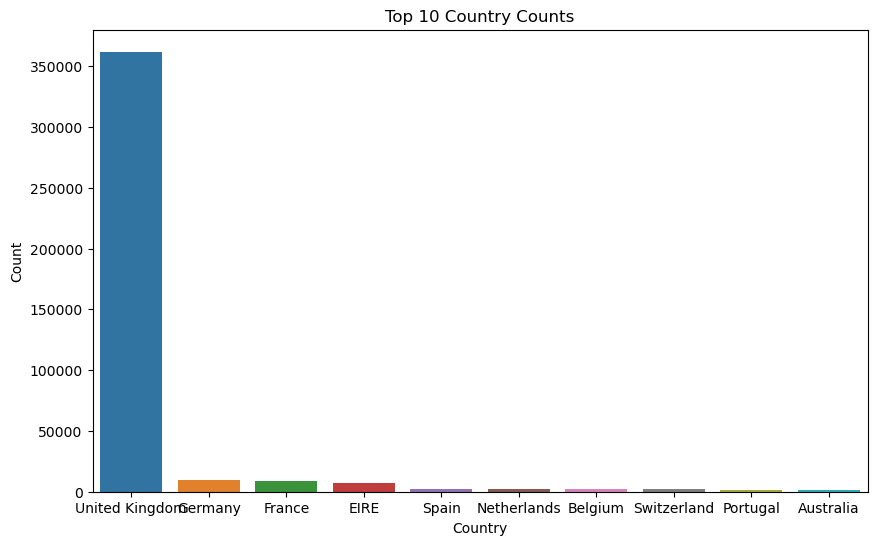

In [54]:
import matplotlib.pyplot as plt
import seaborn as sb

column_of_interest = 'Country'

top_values = df[column_of_interest].value_counts().head(10)

plt.figure(figsize=(10, 6))
sb.barplot(x=top_values.index, y=top_values.values)
plt.title(f'Top 10 {column_of_interest} Counts')
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.show()

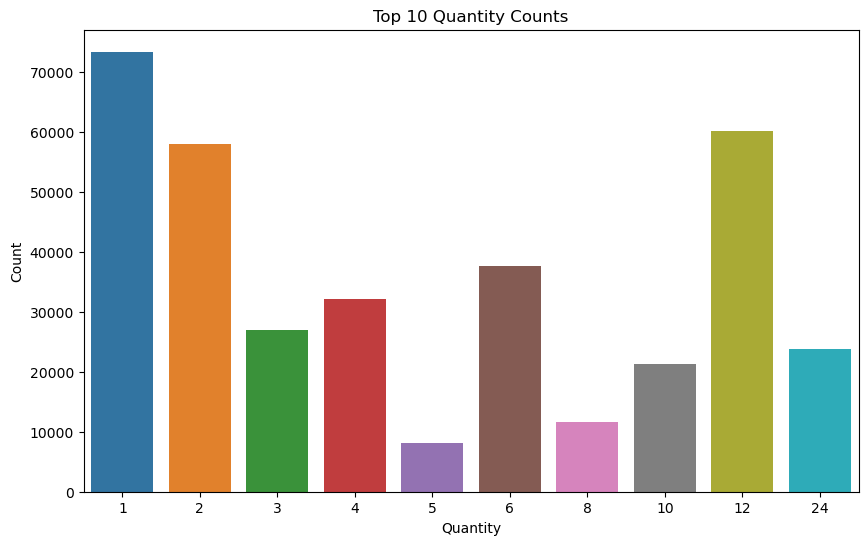

In [55]:
import matplotlib.pyplot as plt
import seaborn as sb

column_of_interest = 'Quantity'

top_values = df[column_of_interest].value_counts().head(10)

plt.figure(figsize=(10, 6))
sb.barplot(x=top_values.index, y=top_values.values)
plt.title(f'Top 10 {column_of_interest} Counts')
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.show()

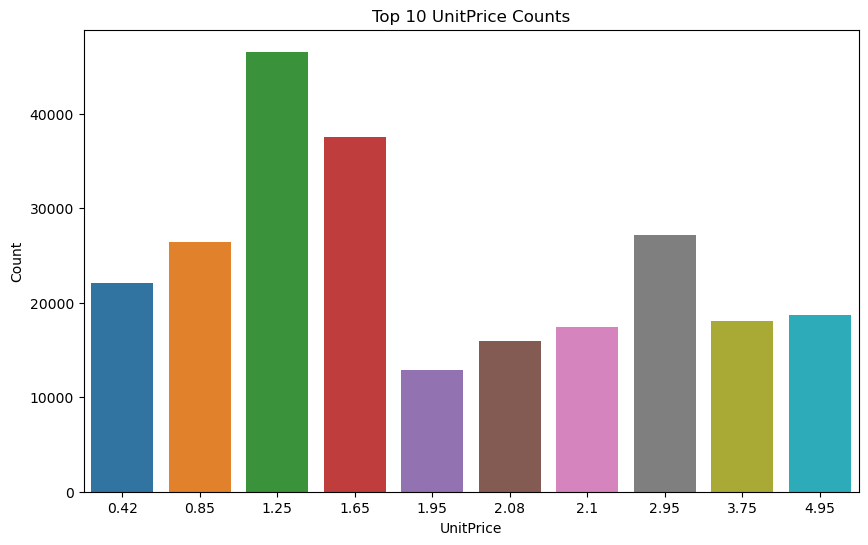

In [57]:
import matplotlib.pyplot as plt
import seaborn as sb

column_of_interest = 'UnitPrice'

top_values = df[column_of_interest].value_counts().head(10)

plt.figure(figsize=(10, 6))
sb.barplot(x=top_values.index, y=top_values.values)
plt.title(f'Top 10 {column_of_interest} Counts')
plt.xlabel(column_of_interest)
plt.ylabel('Count')
plt.show()

In [58]:
df['Quantity'].value_counts()

 1        73314
 12       60033
 2        58003
 6        37688
 4        32183
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: Quantity, Length: 436, dtype: int64

Observation: Negative values in the 'Quantity' column typically indicate returns or cancellations. In a retail dataset, it's common to see negative quantities when customers return items they previously purchased or when there are cancellations of orders.

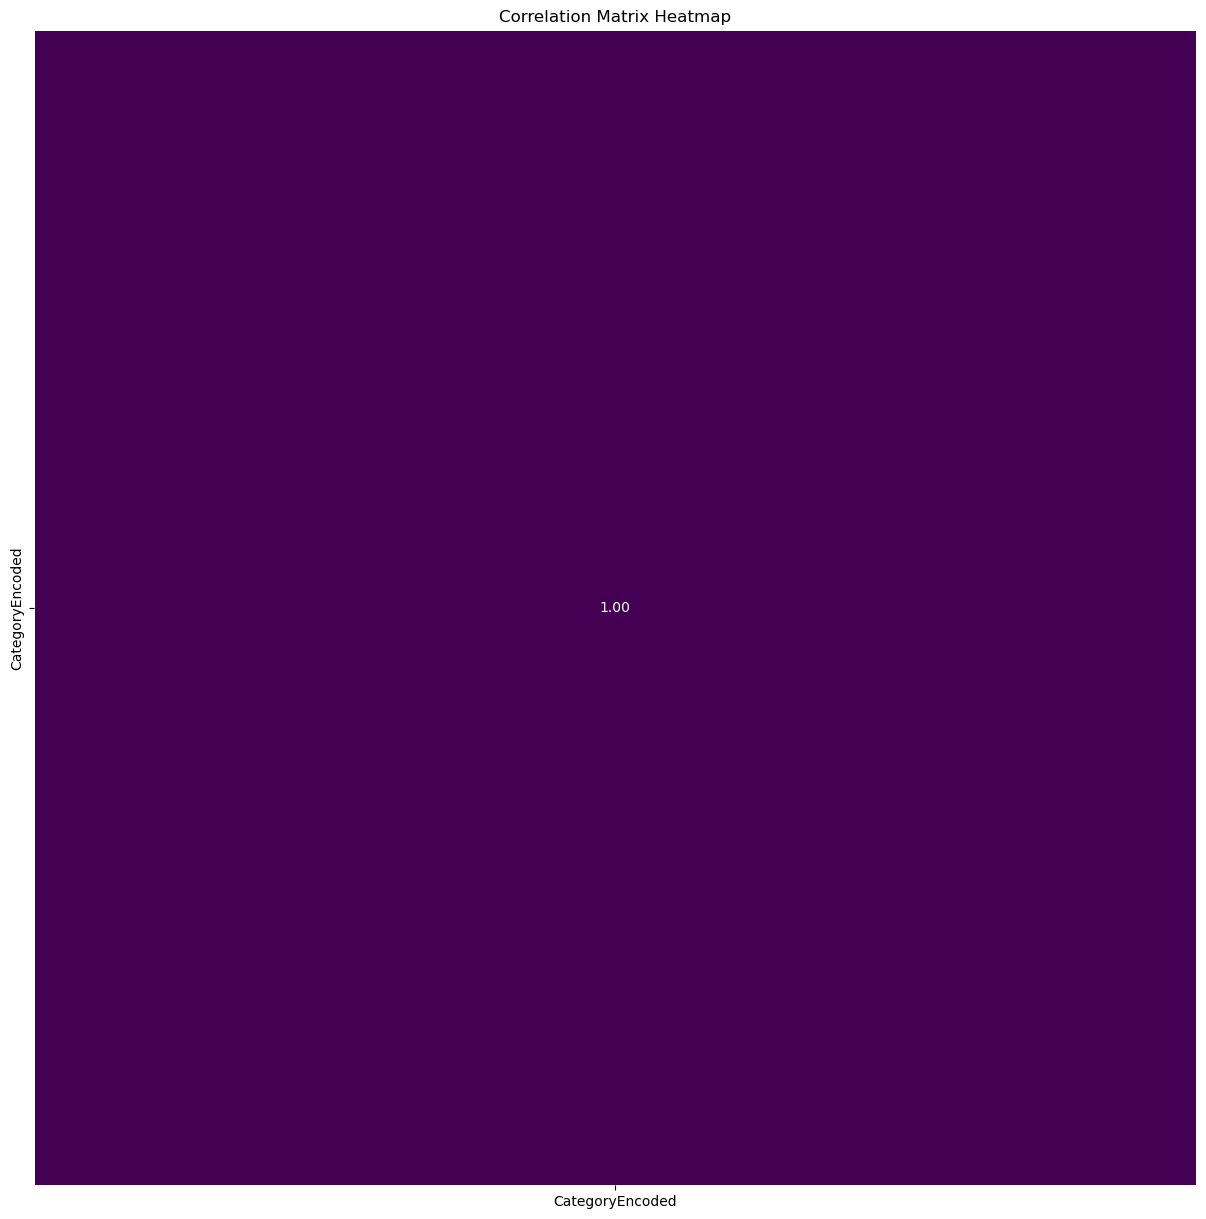

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=.5, cbar=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

If the heatmap is showing a perfect correlation of 1.00 in the center, it means that the variable is perfectly correlated with itself, which is expected. This is because the diagonal of the correlation matrix represents the correlation of each variable with itself, and it's always 1.00.

In [64]:
print(df.corr())

                 CategoryEncoded
CategoryEncoded              1.0


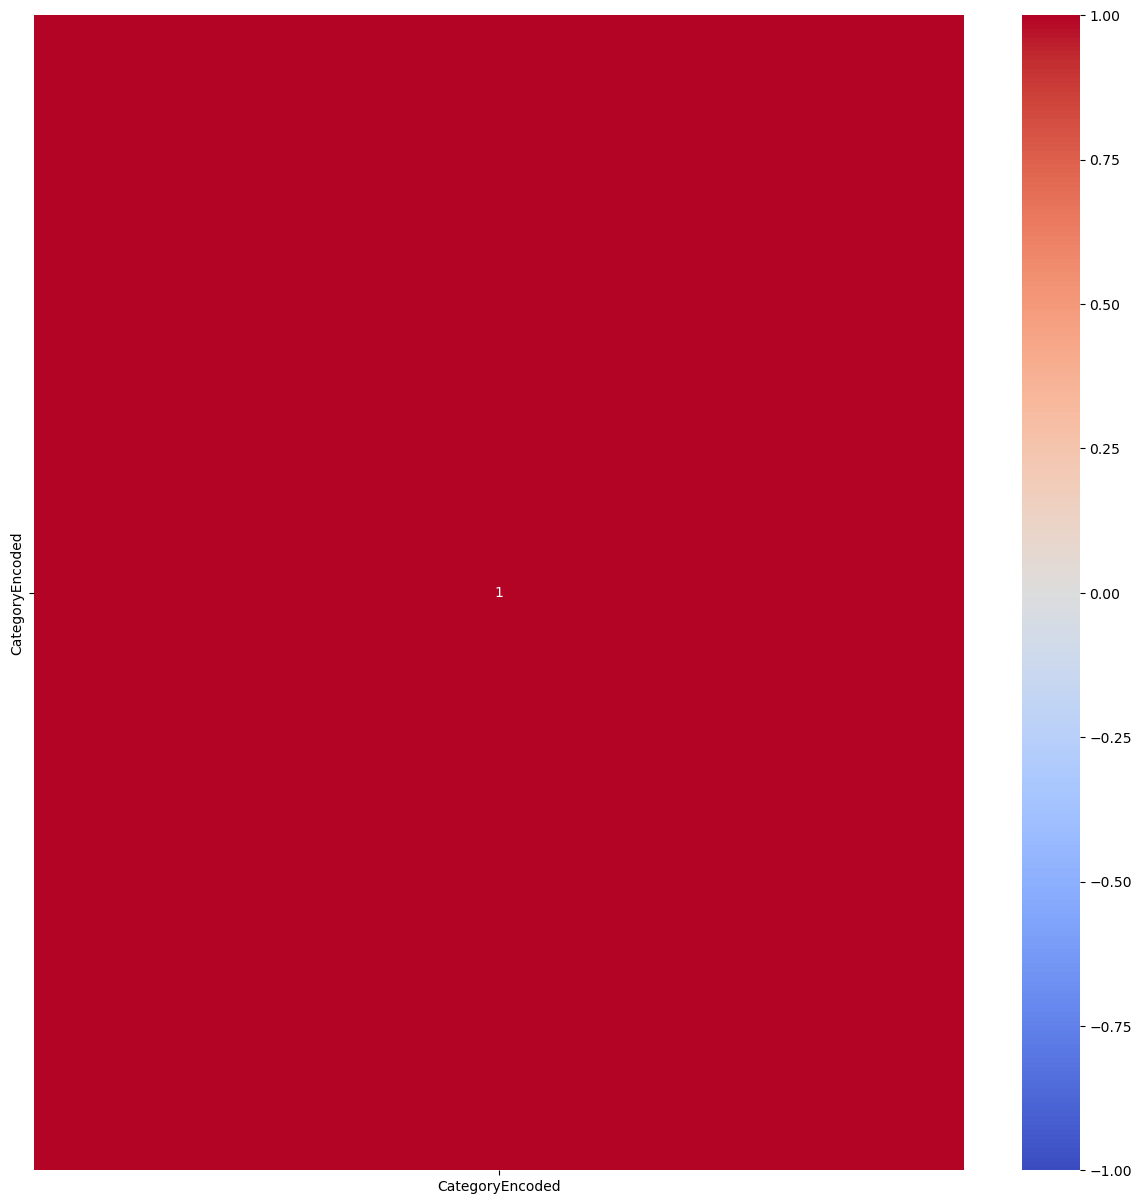

In [65]:
# Trying to adjust the threshold
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

a threshold is a predefined value that you use to determine whether a correlation coefficient is considered high, low, or moderate. It's a cutoff point that helps you decide which correlations are significant and which ones are not.

In [68]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

The standardization process is helpful for machine learning models as it ensures that numerical features are on a similar scale. This can lead to improved model performance, especially for algorithms sensitive to the scale of input variables, by preventing certain features from dominating based solely on their scale. Additionally, it facilitates comparisons and interpretations of the coefficients or feature importances in the model.

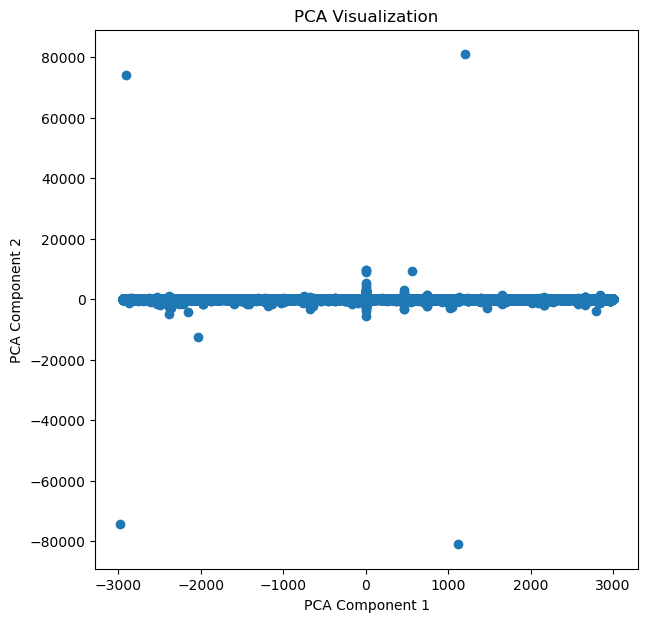

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

file_path = r'C:\Users\manoj\OneDrive\Desktop\CODES\Dataset_cus_seg.csv'
your_data = pd.read_csv(file_path)

numeric_data = your_data.select_dtypes(include=['number'])

imputer = SimpleImputer(strategy='mean')
your_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

numeric_columns = your_data_imputed.columns

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(your_data_imputed[numeric_columns])

plt.figure(figsize=(7, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

PCA visualization is a method to represent complex, high-dimensional data in a simplified 2D or 3D space, preserving key patterns and relationships for easier interpretation and analysis.

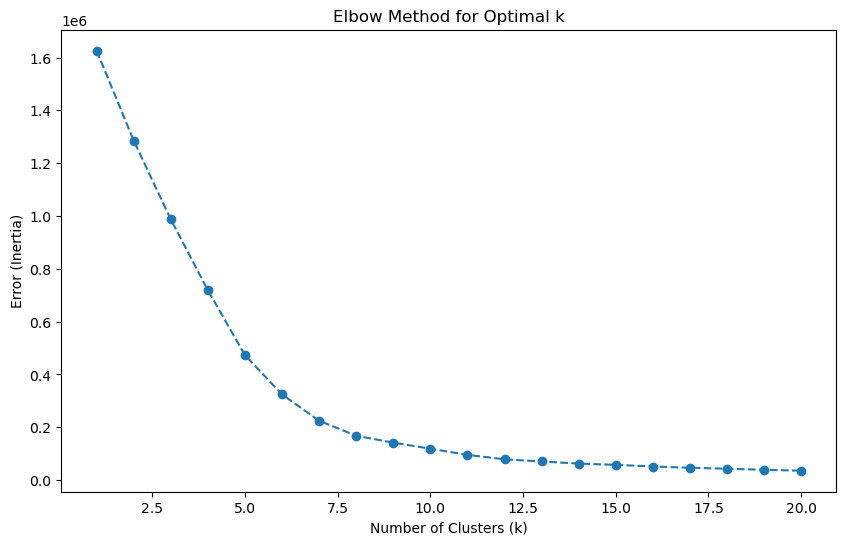

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numeric_data = your_data_imputed.select_dtypes(include=['number'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22,
                   n_init=10)  
    model.fit(scaled_data)
    error.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Error (Inertia)')
plt.show()

This code helps find the best number of groups (clusters) for data. It scales the data, tries clustering for different group numbers, and plots a graph. The "elbow" point in the graph suggests the optimal number of groups, making it easier to analyze and understand the data patterns.

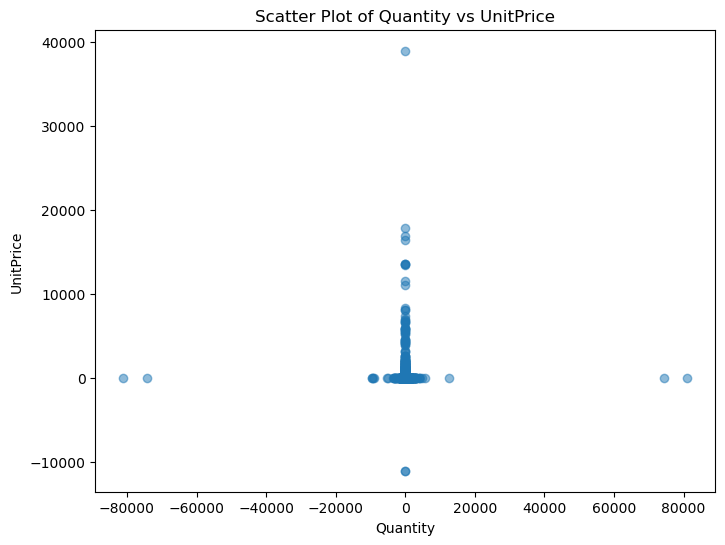

In [10]:
import matplotlib.pyplot as plt

numeric_columns = your_data_imputed.select_dtypes(include=['number']).columns
x_col = numeric_columns[0]
y_col = numeric_columns[1]

plt.figure(figsize=(8, 6))
plt.scatter(your_data_imputed[x_col], your_data_imputed[y_col], alpha=0.5)
plt.title(f'Scatter Plot of {x_col} vs {y_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

A scatter plot is a type of data visualization that displays individual data points on a two-dimensional graph. Each point on the graph represents the values of two variables, one plotted along the x-axis and the other along the y-axis. Scatter plots are particularly useful for visualizing the relationship or correlation between two continuous variables.